## Bentuk Data:

In [1]:
import scipy.io
import numpy as np
mat = scipy.io.loadmat('DATASET/test/CPSZ133.mat')

In [2]:
data = np.array(mat['signal'])[0]
data

array([4.35737156e+03, 4.34927593e+03, 4.34437193e+03, ...,
       3.11111111e-03, 3.11111111e-03, 3.11111111e-03])

In [3]:
import EntropyHub as eh

disp = eh.DispEn(data)

In [4]:
disp

(0.25083008703433485, 0.7996350089932953)

In [5]:
data[5]

4328.2823986183585

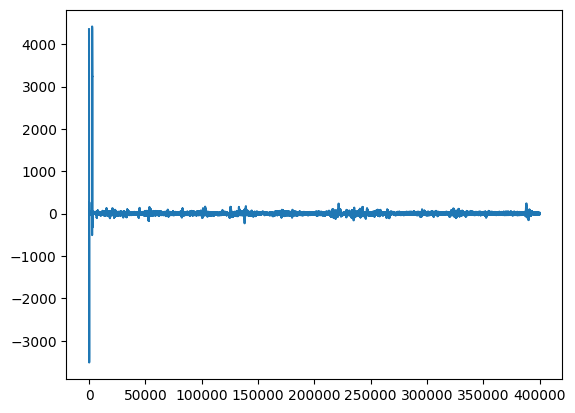

In [6]:
import matplotlib.pyplot as plt
plt.plot(data) 

## Pembuatan Dataset:

In [15]:
import os
import shutil

In [8]:
os.listdir('./DATASET/train')

['GNSZ018.mat',
 'FNSZ053.mat',
 'FNSZ047.mat',
 'FNSZ091.mat',
 'FNSZ046.mat',
 'FNSZ052.mat',
 'GNSZ019.mat',
 'TNSZ009.mat',
 'FNSZ044.mat',
 'FNSZ050.mat',
 'FNSZ093.mat',
 'FNSZ092.mat',
 'FNSZ051.mat',
 'FNSZ045.mat',
 'GNSZ022.mat',
 'GNSZ023.mat',
 'GNSZ035.mat',
 'GNSZ021.mat',
 'GNSZ009.mat',
 'FNSZ042.mat',
 'FNSZ094.mat',
 'FNSZ043.mat',
 'GNSZ008.mat',
 'GNSZ020.mat',
 'FNSZ030.mat',
 'FNSZ018.mat',
 'FNSZ019.mat',
 'FNSZ027.mat',
 'FNSZ033.mat',
 'CPSZ028.mat',
 'FNSZ037.mat',
 'FNSZ009.mat',
 'FNSZ035.mat',
 'FNSZ021.mat',
 'FNSZ008.mat',
 'FNSZ011.mat',
 'FNSZ039.mat',
 'FNSZ004.mat',
 'FNSZ010.mat',
 'FNSZ006.mat',
 'FNSZ012.mat',
 'FNSZ013.mat',
 'FNSZ003.mat',
 'FNSZ017.mat',
 'TCSZ001.mat',
 'FNSZ016.mat',
 'FNSZ028.mat',
 'TCSZ002.mat',
 'FNSZ015.mat',
 'GNSZ011.mat',
 'GNSZ005.mat',
 'GNSZ004.mat',
 'FNSZ070.mat',
 'GNSZ013.mat',
 'GNSZ007.mat',
 'GNSZ003.mat',
 'GNSZ017.mat',
 'FNSZ048.mat',
 'FNSZ049.mat',
 'GNSZ016.mat',
 'GNSZ002.mat',
 'GNSZ014.mat',
 'FNSZ08

In [18]:
#classes:GNSZ, FNSZ, SPSZ, CPSZ, ABSZ, TNSZ, CNSZ, TCSZ, ATSZ, MYSZ
datapath = "./DATASET/train"
for filename in os.listdir(datapath):
    classname = filename[:4]
    if (os.path.exists('./per_class_dataset/'+classname) == False):
        os.makedirs('./per_class_dataset/'+classname)
    shutil.move(os.path.join(datapath,filename) , os.path.join('./per_class_dataset/'+classname,filename))

In [19]:
#classes:GNSZ, FNSZ, SPSZ, CPSZ, ABSZ, TNSZ, CNSZ, TCSZ, ATSZ, MYSZ
datapath = "./DATASET/test"
for filename in os.listdir(datapath):
    classname = filename[:4]
    if (os.path.exists('./per_class_dataset/'+classname) == False):
        os.makedirs('./per_class_dataset/'+classname)
    shutil.move(os.path.join(datapath,filename) , os.path.join('./per_class_dataset/'+classname,filename))

In [20]:
#classes:GNSZ, FNSZ, SPSZ, CPSZ, ABSZ, TNSZ, CNSZ, TCSZ, ATSZ, MYSZ
f = open("train.csv", "w")
f.write("filename,dispersion_entropy,RDE,class")
f.close()

datapath = "./DATASET/train"
for filename in os.listdir(datapath):
    classname = filename[:4]
    mat = scipy.io.loadmat(os.path.join(datapath,filename))
    data = np.array(mat['signal'])[0]
    disp = eh.DispEn(data)
    
    f = open("train.csv", "a")
    f.write("\n"+
        str(filename)+","+
        str(disp[0])+","+
        str(disp[1])+","+
        str(classname)
    )
    f.close()

f = open("test.csv", "w")
f.write("filename,dispersion_entropy,RDE,class")
f.close()

datapath = "./DATASET/test"
for filename in os.listdir(datapath):
    classname = filename[:4]
    mat = scipy.io.loadmat(os.path.join(datapath,filename))
    data = np.array(mat['signal'])[0]
    disp = eh.DispEn(data)
    
    f = open("test.csv", "a")
    f.write("\n"+
        str(filename)+","+
        str(disp[0])+","+
        str(disp[1])+","+
        str(classname)
    )
    f.close()



